In [1]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 19.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 7.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.5 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


Random Forest Model Evaluation
Accuracy: 0.6923076923076923


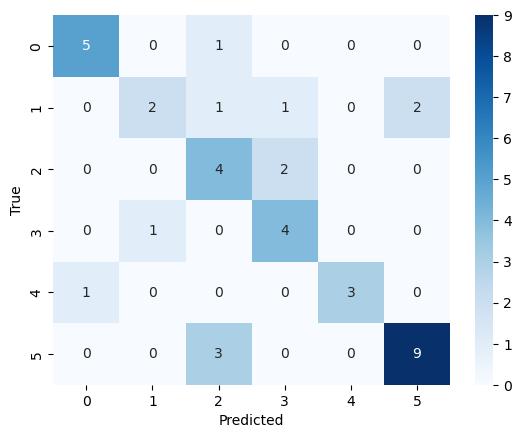

XGBoost Model Evaluation
Accuracy: 0.7692307692307693


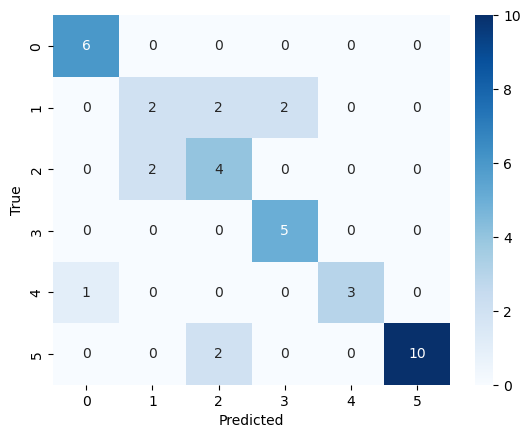

CatBoost Model Evaluation
Accuracy: 0.9230769230769231


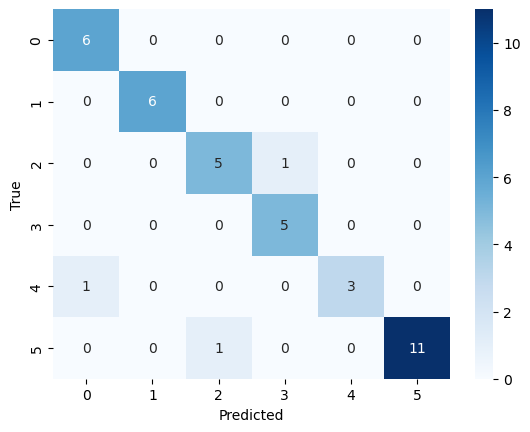

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Modified_minimal.csv')

# One-hot encode the 'companycode' column
data_encoded = pd.get_dummies(data, columns=['companycode'])

# Assuming 'clusterid' is the target variable
X = data_encoded.drop('clusterid - Prediction/OutPut', axis=1)
y = data_encoded['clusterid - Prediction/OutPut']

# Adjust class labels to start from 0
y = y - 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# CatBoost Classifier
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate Random Forest Model
print("Random Forest Model Evaluation")
evaluate_model(rf_model, X_test, y_test)

# Evaluate XGBoost Model
print("XGBoost Model Evaluation")
evaluate_model(xgb_model, X_test, y_test)

# Evaluate CatBoost Model
print("CatBoost Model Evaluation")
evaluate_model(cat_model, X_test, y_test)

Random Forest Evaluation
Accuracy: 0.6923
Precision: 0.7267
Recall: 0.6923
F1 Score: 0.6928


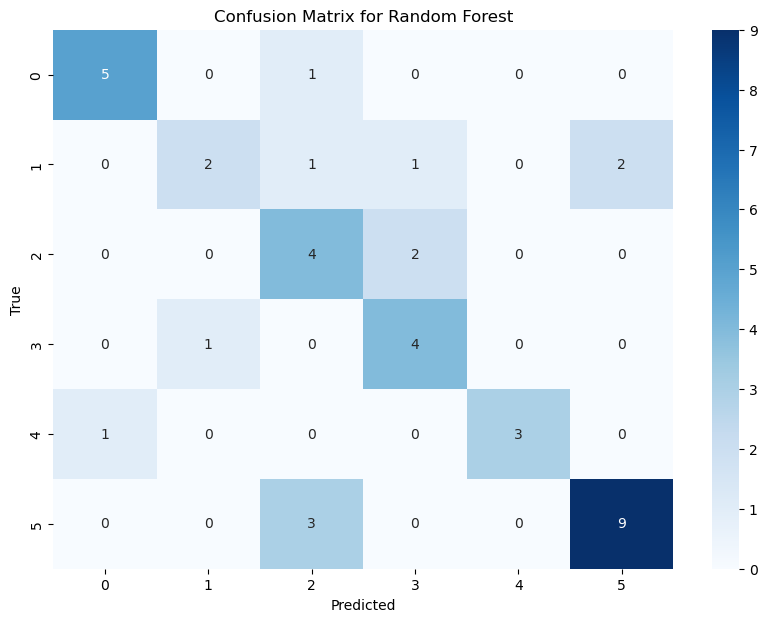

XGBoost Evaluation
Accuracy: 0.7692
Precision: 0.7875
Recall: 0.7692
F1 Score: 0.7659


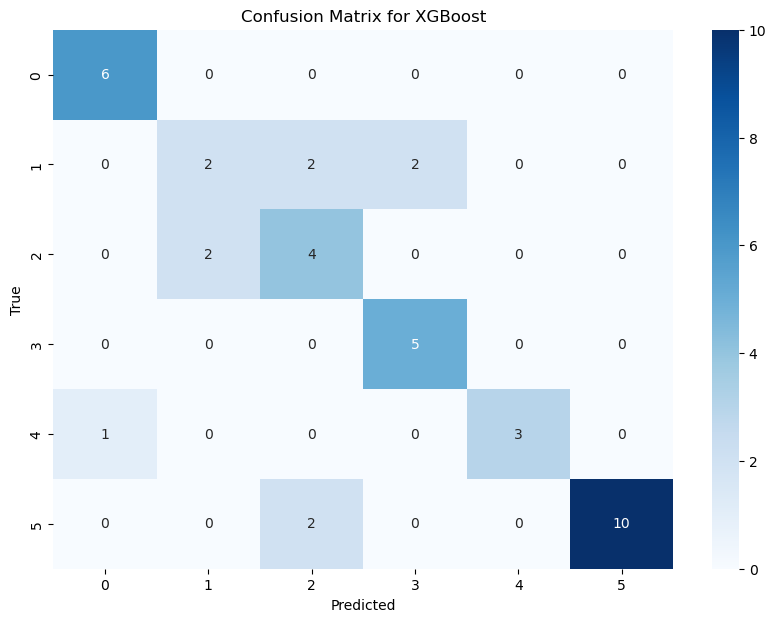

CatBoost Evaluation
Accuracy: 0.9231
Precision: 0.9310
Recall: 0.9231
F1 Score: 0.9228


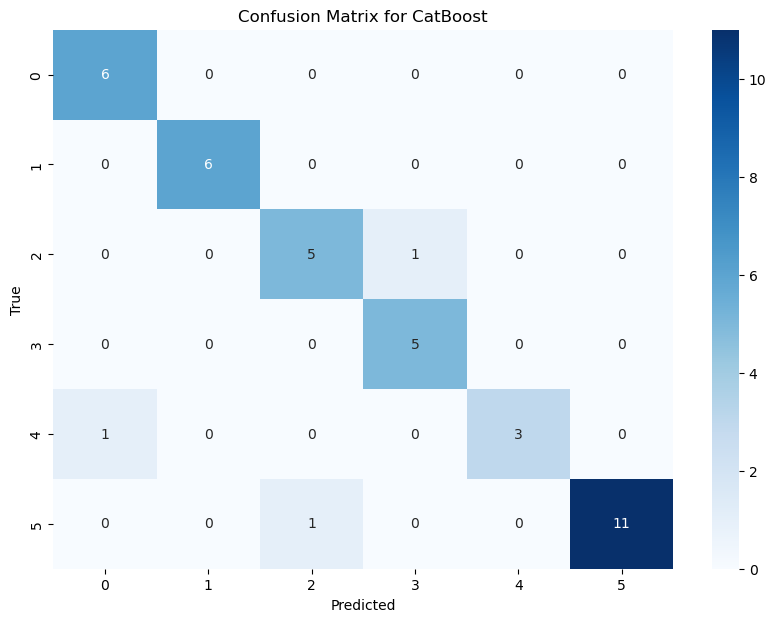

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name):
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"{model_name} Evaluation")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Evaluate each model
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")
evaluate_model(cat_model, X_test, y_test, "CatBoost")

Next part is for Cleaned_1.csv minimal testing . Contains 9 samples from each class .

Random Forest Model Evaluation
Accuracy: 0.9090909090909091


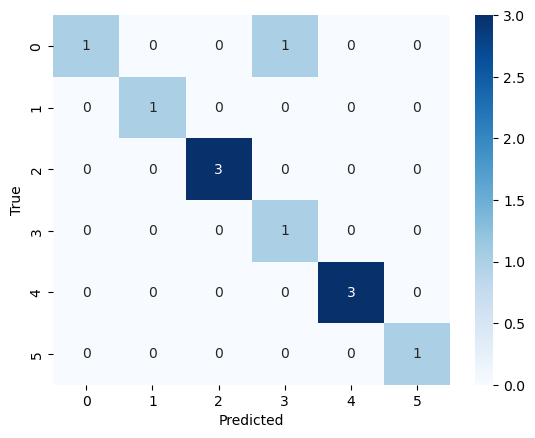

XGBoost Model Evaluation
Accuracy: 1.0


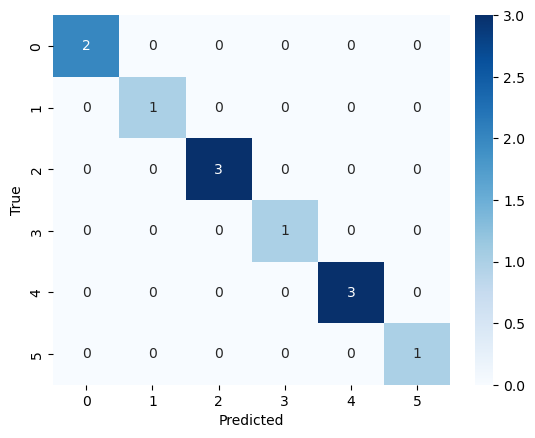

CatBoost Model Evaluation
Accuracy: 0.9090909090909091


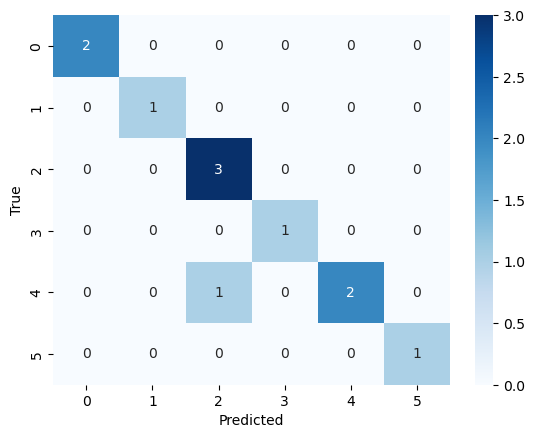

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('Modified_Cleaned_minimal.csv')

# One-hot encode the 'companycode' column
data_encoded = pd.get_dummies(data, columns=['companycode'])

# Assuming 'clusterid' is the target variable
X = data_encoded.drop('clusterid - Prediction/OutPut', axis=1)
y = data_encoded['clusterid - Prediction/OutPut']

# Adjust class labels to start from 0
y = y - 1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# CatBoost Classifier
cat_model = CatBoostClassifier(verbose=0)
cat_model.fit(X_train, y_train)

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate Random Forest Model
print("Random Forest Model Evaluation")
evaluate_model(rf_model, X_test, y_test)

# Evaluate XGBoost Model
print("XGBoost Model Evaluation")
evaluate_model(xgb_model, X_test, y_test)

# Evaluate CatBoost Model
print("CatBoost Model Evaluation")
evaluate_model(cat_model, X_test, y_test)

Random Forest Evaluation
Accuracy: 0.9091
Precision: 0.9545
Recall: 0.9091
F1 Score: 0.9091


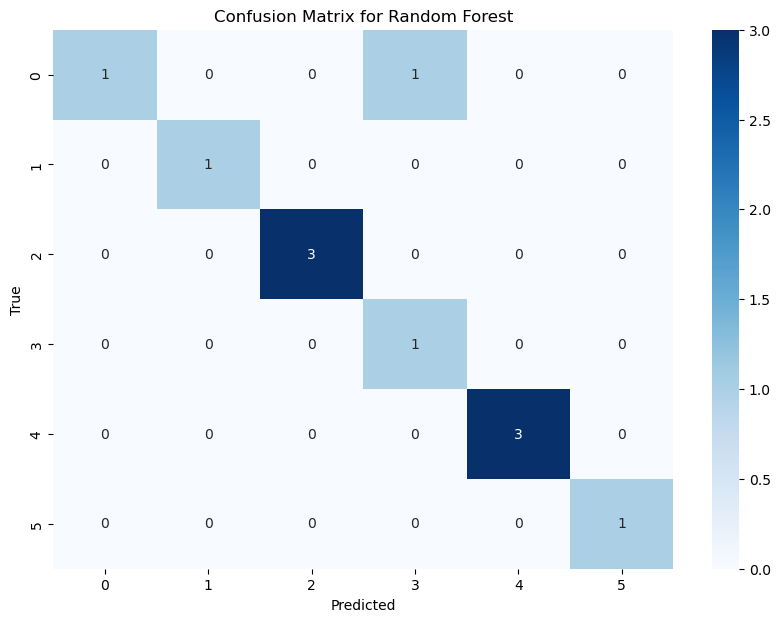

XGBoost Evaluation
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


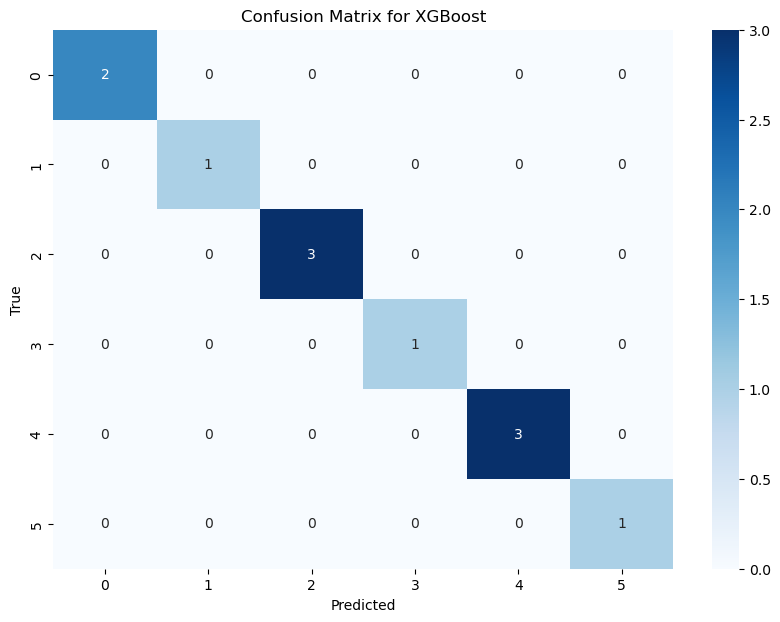

CatBoost Evaluation
Accuracy: 0.9091
Precision: 0.9318
Recall: 0.9091
F1 Score: 0.9065


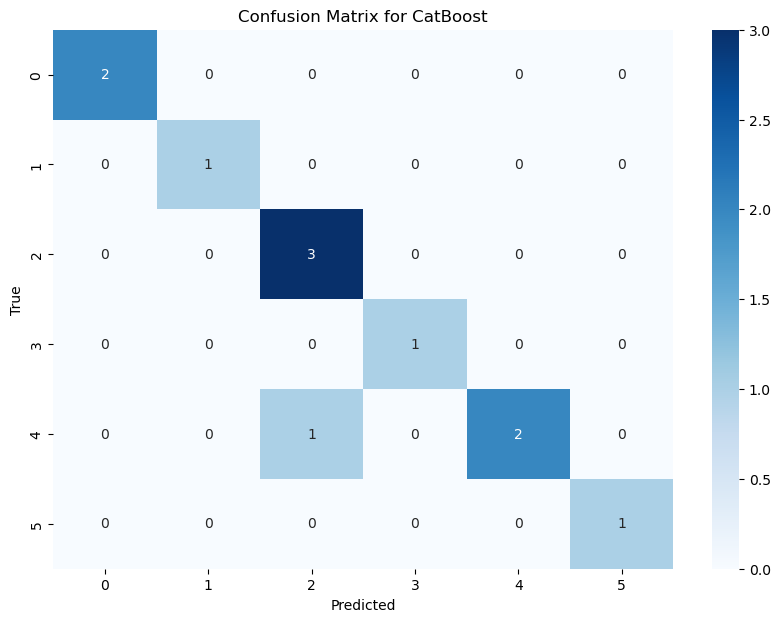

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name):
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"{model_name} Evaluation")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Evaluate each model
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")
evaluate_model(cat_model, X_test, y_test, "CatBoost")